In [ ]:
#Importing dependencies
from sklearn.cluster import KMeans as KM
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler as SS
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV as GSCV
from sklearn.model_selection import train_test_split as TTS
import pandas as pd
from sklearn.decomposition import PCA

Cleaning IMDB_match file

In [ ]:
# importing film_imdb_match.csv 
film_imdb = pd.read_csv('/content/film_imdb_match.csv', index_col=0)
film_imdb

,Title,Trope,Example,CleanTitle,tconst,trope_id,title_id
0,ABBATheMovie,MsFanservice,The concert segments make it clear that Agnet...,abbathemovie,tt0075617,t14656,f0
1,ABBATheMovie,InsistentTerminology,The radio station manager that tasks Ashley w...,abbathemovie,tt0075617,t11527,f0
2,ABBATheMovie,TheIngenue,A rare male example; when Benny reads one new...,abbathemovie,tt0075617,t23019,f0
3,ABBATheMovie,GettingCrapPastTheRadar,During Ashley's fantasy sequence in which he ...,abbathemovie,tt0075617,t09016,f0
4,ABBATheMovie,WhoWearsShortShorts,"Frida's outfit in the ""Why Did It Have to Be ...",abbathemovie,tt0075617,t25994,f0
...,...,...,...,...,...,...,...
759076,Zygote,CanaryInACoalMine,Zygote: Canary Class synthetics like Barklay ...,zygote,tt10117046,t03153,f17016
759077,Zygote,ScannableMan,Zygote. Barklay has a barcode because she is ...,zygote,tt10117046,t19396,f17016
759078,Zygote,EerieArcticResearchStation,Zygote is set 20 Minutes into the Future at a...,zygote,tt10117046,t06556,f17016
759079,Zygote,SciFiHorror,Zygote\n,zygote,tt10117046,t30297,f17016


In [ ]:
# Drop Example column
df_imdb = film_imdb.drop(columns=['Example'])
df_imdb

,Title,Trope,CleanTitle,tconst,trope_id,title_id
0,ABBATheMovie,MsFanservice,abbathemovie,tt0075617,t14656,f0
1,ABBATheMovie,InsistentTerminology,abbathemovie,tt0075617,t11527,f0
2,ABBATheMovie,TheIngenue,abbathemovie,tt0075617,t23019,f0
3,ABBATheMovie,GettingCrapPastTheRadar,abbathemovie,tt0075617,t09016,f0
4,ABBATheMovie,WhoWearsShortShorts,abbathemovie,tt0075617,t25994,f0
...,...,...,...,...,...,...
759076,Zygote,CanaryInACoalMine,zygote,tt10117046,t03153,f17016
759077,Zygote,ScannableMan,zygote,tt10117046,t19396,f17016
759078,Zygote,EerieArcticResearchStation,zygote,tt10117046,t06556,f17016
759079,Zygote,SciFiHorror,zygote,tt10117046,t30297,f17016


In [ ]:
# number of films
print(df_imdb['title_id'].nunique())

# number of tropes
print(df_imdb['trope_id'].nunique())

# number of tconst --> based on imdb documentation, this is the ID imdb used for the media title
print(df_imdb['tconst'].nunique())

8816
25550
8796


In [ ]:
# grouping data by trope_id to get count of the number of films each trope is mentioned in, sorting in descending order
# can see row number matches number of tropes from above (25550)
tropeCount_imdb = df_imdb.groupby(['trope_id']).count().sort_values('title_id', ascending=False)
tropeCount_imdb

,Title,Trope,CleanTitle,tconst,title_id
trope_id,,,,,
t20214,1151,1151,1151,1151,1151
t29237,1072,1072,1072,1072,1072
t29337,771,771,771,771,771
t15984,719,719,719,719,719
t03644,716,716,716,716,716
...,...,...,...,...,...
t20517,1,1,1,1,1
t02884,1,1,1,1,1
t00853,1,1,1,1,1


In [ ]:
# getting basic stats for tropeCount title_id column
print(tropeCount_imdb.title_id.describe())

# max number of film-mentions for a single trope = 1151
# 75% of tropes only mentioned in 1-16 films

count    25550.000000
mean        15.284188
std         29.928950
min          1.000000
25%          3.000000
50%          7.000000
75%         16.000000
max       1151.000000
Name: title_id, dtype: float64


In [ ]:
# getting value counts of the tropeCount to see how many tropes are mentioned 1, 2, 3 times etc.
tropeCount_filmTitleID_imdb = tropeCount_imdb.title_id.value_counts()
tropeCount_filmTitleID_imdb

# 2765 tropes have only 1 film title in which they are mentioned
# one trope is mentioned in 199 film titles


1      2765
2      2333
3      2006
4      1712
5      1561
       ... 
216       1
264       1
360       1
552       1
199       1
Name: title_id, Length: 271, dtype: int64

In [ ]:
# looking at tropes that have been mentioned in over 16 films (based on 75th percentile) --> reduces tropes from over 25500 to 6287
tropeCount_imdb.loc[tropeCount_imdb['title_id'] >16]

,Title,Trope,CleanTitle,tconst,title_id
trope_id,,,,,
t20214,1151,1151,1151,1151,1151
t29237,1072,1072,1072,1072,1072
t29337,771,771,771,771,771
t15984,719,719,719,719,719
t03644,716,716,716,716,716
...,...,...,...,...,...
t11483,17,17,17,17,17
t24305,17,17,17,17,17
t16429,17,17,17,17,17


In [ ]:
tropes_to_keep = tropeCount_imdb.loc[tropeCount_imdb['title_id'] >16]
tropes_to_keep = pd.DataFrame(tropes_to_keep).reset_index()
display(tropes_to_keep)
tropes_to_keep_list = tropes_to_keep.loc[tropes_to_keep['trope_id'].index, 'trope_id'].to_list()
print(tropes_to_keep_list)
print(len(tropes_to_keep_list))

,trope_id,Title,Trope,CleanTitle,tconst,title_id
0,t20214,1151,1151,1151,1151,1151
1,t29237,1072,1072,1072,1072,1072
2,t29337,771,771,771,771,771
3,t15984,719,719,719,719,719
4,t03644,716,716,716,716,716
...,...,...,...,...,...,...
6282,t11483,17,17,17,17,17
6283,t24305,17,17,17,17,17
6284,t16429,17,17,17,17,17
6285,t16460,17,17,17,17,17


['t20214', 't29237', 't29337', 't15984', 't03644', 't02187', 't08393', 't05235', 't22690', 't02336', 't24006', 't12565', 't10402', 't25848', 't19186', 't13853', 't12069', 't02839', 't02114', 't04686', 't01428', 't09561', 't02549', 't02627', 't03097', 't18297', 't24108', 't12292', 't26668', 't11821', 't06260', 't17579', 't10114', 't09016', 't25818', 't03051', 't07663', 't06980', 't26550', 't14940', 't00328', 't14656', 't10347', 't23399', 't15265', 't22464', 't18741', 't03648', 't25880', 't02215', 't04446', 't17752', 't19445', 't00897', 't10094', 't20226', 't25182', 't14868', 't06939', 't09986', 't03353', 't16933', 't12575', 't22219', 't15522', 't08551', 't17317', 't05943', 't01232', 't22582', 't15718', 't23423', 't02282', 't07399', 't22820', 't02444', 't15187', 't07317', 't26776', 't21497', 't07200', 't10518', 't19574', 't02256', 't26709', 't03382', 't05847', 't23319', 't10932', 't21138', 't10817', 't08691', 't15980', 't03645', 't07357', 't00369', 't25284', 't03332', 't03278', 't01625',

In [ ]:
df_imdb_top25th = df_imdb[df_imdb.trope_id.isin(tropes_to_keep_list) == True]
display(df_imdb_top25th)
print(df_imdb_top25th['trope_id'].unique())
print(len(df_imdb_top25th['trope_id'].unique()))

,Title,Trope,CleanTitle,tconst,trope_id,title_id
0,ABBATheMovie,MsFanservice,abbathemovie,tt0075617,t14656,f0
1,ABBATheMovie,InsistentTerminology,abbathemovie,tt0075617,t11527,f0
2,ABBATheMovie,TheIngenue,abbathemovie,tt0075617,t23019,f0
3,ABBATheMovie,GettingCrapPastTheRadar,abbathemovie,tt0075617,t09016,f0
4,ABBATheMovie,WhoWearsShortShorts,abbathemovie,tt0075617,t25994,f0
...,...,...,...,...,...,...
758972,ZorroTheGayBlade,LargeHam,zorrothegayblade,tt0083366,t12565,f17010
758975,Zotz,Feelies,zotz,tt0056725,t07858,f17011
758976,Zotz,LightningCanDoAnything,zotz,tt0056725,t12888,f17011
759073,Zygote,BorrowedBiometricBypass,zygote,tt10117046,t02668,f17016


['t14656' 't11527' 't23019' ... 't14045' 't25691' 't23244']
6287


In [ ]:
df_imdb_top25th['title_id'].nunique() 

8030

In [ ]:
df_imdb_top25th['Trope'].nunique()

6287

In [ ]:
df = df_imdb_top25th.groupby(['title_id']).count().sort_values('trope_id', ascending=False)
titles_to_sample = pd.DataFrame(df).reset_index()
display(titles_to_sample)
titles_to_sample_list = titles_to_sample.loc[titles_to_sample['title_id'].index, 'title_id'].to_list()
print(titles_to_sample_list)
print(len(titles_to_sample_list))

,title_id,Title,Trope,CleanTitle,tconst,trope_id
0,f12642,1094,1094,1094,1094,1094
1,f12644,967,967,967,967,967
2,f14015,940,940,940,940,940
3,f2133,870,870,870,870,870
4,f11279,858,858,858,858,858
...,...,...,...,...,...,...
8025,f792,1,1,1,1,1
8026,f7919,1,1,1,1,1
8027,f244,1,1,1,1,1
8028,f2442,1,1,1,1,1


['f12642', 'f12644', 'f14015', 'f2133', 'f11279', 'f2132', 'f15491', 'f12063', 'f2130', 'f6529', 'f3378', 'f1194', 'f11290', 'f1535', 'f6212', 'f1197', 'f16781', 'f6214', 'f7499', 'f9659', 'f6085', 'f1204', 'f15492', 'f1586', 'f14460', 'f6101', 'f1027', 'f15625', 'f7814', 'f14991', 'f2142', 'f16806', 'f16839', 'f11281', 'f1195', 'f1079', 'f16840', 'f9288', 'f3138', 'f3451', 'f12194', 'f9280', 'f1201', 'f4634', 'f14635', 'f16824', 'f12269', 'f4451', 'f472', 'f17008', 'f13414', 'f10876', 'f4232', 'f10672', 'f6343', 'f9421', 'f1080', 'f3470', 'f6102', 'f11507', 'f3596', 'f15019', 'f2468', 'f6963', 'f14107', 'f8755', 'f6411', 'f10320', 'f6547', 'f841', 'f3439', 'f13473', 'f767', 'f15857', 'f8079', 'f6267', 'f13468', 'f14760', 'f857', 'f2238', 'f15751', 'f9846', 'f12992', 'f42', 'f16677', 'f8373', 'f4822', 'f7677', 'f15786', 'f11576', 'f5552', 'f9085', 'f16089', 'f5443', 'f11282', 'f9037', 'f12292', 'f11280', 'f15872', 'f4212', 'f10744', 'f14763', 'f4931', 'f13264', 'f7567', 'f10674', 'f615

In [ ]:
import random
df_imdb_fSampleList1 = random.sample(titles_to_sample_list, 2000)

In [ ]:
df_imdb_S1 = df_imdb_top25th[df_imdb_top25th.title_id.isin(df_imdb_fSampleList1) == True]
display(df_imdb_S1)

print(df_imdb_S1['title_id'].unique())
print(len(df_imdb_S1['title_id'].unique()))

,Title,Trope,CleanTitle,tconst,trope_id,title_id
36,ABCsOfDeath2,AssShove,abcsofdeath2,tt2926810,t01441,f1
37,ABCsOfDeath2,ManBitesMan,abcsofdeath2,tt2926810,t13655,f1
38,ABCsOfDeath2,StrappedToAnOperatingTable,abcsofdeath2,tt2926810,t21612,f1
41,ABCsOfDeath2,ReliablyUnreliableGuns,abcsofdeath2,tt2926810,t18567,f1
42,ABCsOfDeath2,TrappedInTVLand,abcsofdeath2,tt2926810,t24339,f1
...,...,...,...,...,...,...
757887,Zookeeper,HollywoodUgly,zookeeper,tt1222817,t28833,f17001
758283,Zoombies,EscapedAnimalRampage,zoombies,tt5340882,t06920,f17007
758284,Zoombies,HorrorFilms,zoombies,tt5340882,t29237,f17007
758285,Zoombies,RaisingTheSteaks,zoombies,tt5340882,t18160,f17007


['f1' 'f6' 'f17' ... 'f16995' 'f17001' 'f17007']
2000


In [ ]:
df_imdb_S1_test = df_imdb_S1.drop(columns=['CleanTitle', 'tconst', 'trope_id', 'title_id'])
display(df_imdb_S1_test)

,Title,Trope
36,ABCsOfDeath2,AssShove
37,ABCsOfDeath2,ManBitesMan
38,ABCsOfDeath2,StrappedToAnOperatingTable
41,ABCsOfDeath2,ReliablyUnreliableGuns
42,ABCsOfDeath2,TrappedInTVLand
...,...,...
757887,Zookeeper,HollywoodUgly
758283,Zoombies,EscapedAnimalRampage
758284,Zoombies,HorrorFilms
758285,Zoombies,RaisingTheSteaks


In [ ]:
#Removing any Leading and Trailing Spaces in the columns
df_imdb_S1_test['Title'] = df_imdb_S1_test['Title'].str.strip()
df_imdb_S1_test['Trope'] = df_imdb_S1_test['Trope'].str.strip()

In [ ]:
#Removing Duplicates
df_imdb_S1_test = df_imdb_S1_test.drop_duplicates(keep='first', inplace=False)
display(df_imdb_S1_test)

,Title,Trope
36,ABCsOfDeath2,AssShove
37,ABCsOfDeath2,ManBitesMan
38,ABCsOfDeath2,StrappedToAnOperatingTable
41,ABCsOfDeath2,ReliablyUnreliableGuns
42,ABCsOfDeath2,TrappedInTVLand
...,...,...
757886,Zookeeper,TheShelfOfMovieLanguishment
757887,Zookeeper,HollywoodUgly
758283,Zoombies,EscapedAnimalRampage
758284,Zoombies,HorrorFilms


In [ ]:
df_imdb_S1_test = df_imdb_S1_test.set_index('Trope')
display(df_imdb_S1_test)

,Title
Trope,
AssShove,ABCsOfDeath2
ManBitesMan,ABCsOfDeath2
StrappedToAnOperatingTable,ABCsOfDeath2
ReliablyUnreliableGuns,ABCsOfDeath2
TrappedInTVLand,ABCsOfDeath2
...,...
TheShelfOfMovieLanguishment,Zookeeper
HollywoodUgly,Zookeeper
EscapedAnimalRampage,Zoombies


In [ ]:
# Running get dummies on data w/ trope as index
df_imdb_S1_test_n = pd.get_dummies(df_imdb_S1_test)
display(df_imdb_S1_test_n)
print(df_imdb_S1_test_n.dtypes.unique())

,Title_ABCsOfDeath2,Title_ABirdersGuideToEverything,Title_ABugsLife,Title_AChristmasCarol1938,Title_ACivilAction,Title_AClockworkOrange,Title_AColtIsMyPassport,Title_ACompleteHistoryOfMySexualFailures,Title_ACountryChristmas,Title_ADogsBreakfast,Title_ADryWhiteSeason,Title_AFairlyOddChristmas,Title_AFieldInEngland,Title_AGirlNamedSooner,Title_AGnomeNamedGnorm,Title_AGoodDayToDieHard,Title_AGoofyMovie,Title_AHauntedHouse,Title_AHistoryOfViolence,Title_AKnightsTale,Title_ALifeLessOrdinary,Title_AManCalledHero,Title_AMatterOfFaith,Title_AMidnightClear,Title_AMightyHeart,Title_AMostWantedMan,Title_AMuppetFamilyChristmas,Title_ANannyForChristmas,Title_ANewLeaf,Title_ANightAtTheRoxbury,Title_ANightToDismember,Title_APerfectMurder,Title_APlaceToStand,Title_APrincessForChristmas,Title_AQuietPlacePartII,Title_ARQ,Title_ARiverRunsThroughIt,Title_ARoyalChristmas,Title_ARoyalNightOut,Title_ASimpleWish,...,Title_WickedLittleThings,Title_WickerPark,Title_WielkiSzu,Title_WildBoys,Title_WildOrchid,Title_WildRose2018,Title_WildWildWest,Title_WildZero,Title_WindyCity,Title_Wings1966,Title_Wizards,Title_Wolfen,Title_WolvesAtTheDoor,Title_WomanInTheDunes,Title_WonderWoman1984,Title_WoodyWoodpecker,Title_WorldGoneWild,Title_WorldWarZ,Title_WorthWinning,Title_Wrestlemaniac,Title_WristcuttersALoveStory,Title_WrittenOnTheWind,Title_WrongfullyAccused,Title_WyattEarp,Title_YankeeDoodleDandy,Title_YearOfTheComet,Title_YogaHosers,Title_YouDontMessWithTheZohan,Title_YouMeAndDupree,Title_YouMightAsWellLive,Title_YoungManWithAHorn,Title_Zardoz,Title_Zatoichi,Title_ZeroMotivation,Title_ZombieFightClub,Title_ZombieNightmare,Title_ZombieProm,Title_Zombies2018,Title_Zookeeper,Title_Zoombies
Trope,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AssShove,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ManBitesMan,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
StrappedToAnOperatingTable,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ReliablyUnreliableGuns,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TrappedInTVLand,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TheShelfOfMovieLanguishment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
HollywoodUgly,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
EscapedAnimalRampage,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


[dtype('uint8')]


In [ ]:
#Mounting Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Saving df as csv to view. 
#df_imdb_S1_test_n.to_csv("data.csv")
#!cp data.csv "drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pca = PCA(n_components=0.90) 

sample1_pca = pca.fit_transform(df_imdb_S1_test_n) 

sample1_pca_df = pd.DataFrame(data=sample1_pca, columns=['principal component %i' % i for i in range(len(sample1_pca[0]))])

sample1_pca_df

,principal component 0,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,principal component 31,principal component 32,principal component 33,principal component 34,principal component 35,principal component 36,principal component 37,principal component 38,principal component 39,...,principal component 842,principal component 843,principal component 844,principal component 845,principal component 846,principal component 847,principal component 848,principal component 849,principal component 850,principal component 851,principal component 852,principal component 853,principal component 854,principal component 855,principal component 856,principal component 857,principal component 858,principal component 859,principal component 860,principal component 861,principal component 862,principal component 863,principal component 864,principal component 865,principal component 866,principal component 867,principal component 868,principal component 869,principal component 870,principal component 871,principal component 872,principal component 873,principal component 874,principal component 875,principal component 876,principal component 877,principal component 878,principal component 879,principal component 880,principal component 881
0,-0.005443,-0.004587,-0.007110,-0.004906,-0.001726,-0.008161,-0.005147,-0.006328,-0.003275,-0.003684,-0.002507,3.027621e-16,1.933186e-16,0.001953,-0.003452,-0.005528,-0.004370,-0.003744,-0.003512,-0.002700,-0.003112,-0.004408,-0.001318,-0.002675,-8.918553e-17,-0.004860,-0.002839,-0.001604,-0.005314,-0.002155,-0.001344,-0.001561,-0.001756,-0.004817,-0.001388,-0.001668,-0.003147,-0.001629,-0.003021,-3.396965e-16,...,1.416682e-17,-4.696940e-17,-2.264724e-17,7.065769e-17,1.563566e-16,-4.592527e-18,-2.822989e-17,8.348200e-19,-2.291562e-17,5.335958e-18,5.945176e-17,-3.154008e-17,4.100964e-17,-1.509017e-17,1.284106e-17,-2.571555e-17,2.664687e-17,-1.334331e-17,3.100903e-17,7.763119e-17,-5.915589e-18,-2.820576e-18,-1.763048e-17,6.450621e-18,-3.422192e-17,-1.103033e-17,1.368951e-18,-3.716856e-17,6.876038e-18,-2.612402e-16,-4.027893e-17,1.144196e-17,-1.582049e-17,8.643840e-18,-2.769056e-17,-2.664738e-18,-0.006579,4.560739e-16,2.810382e-18,7.990759e-18
1,-0.005443,-0.004587,-0.007110,-0.004906,-0.001726,-0.008161,-0.005147,-0.006328,-0.003275,-0.003684,-0.002507,3.019345e-16,3.043490e-16,0.001953,-0.003452,-0.005528,-0.004370,-0.003744,-0.003512,-0.002700,-0.003112,-0.004408,-0.001318,-0.002675,2.003539e-16,-0.004860,-0.002839,-0.001604,-0.005314,-0.002155,-0.001344,-0.001561,-0.001756,-0.004817,-0.001388,-0.001668,-0.003147,-0.001629,-0.003021,-6.439369e-16,...,-1.588685e-17,4.829591e-17,2.373900e-17,1.003972e-17,6.013556e-17,-6.377739e-17,2.455586e-17,-4.306676e-17,1.179295e-17,1.214370e-17,1.338411e-17,-3.585704e-17,4.668216e-18,-1.338788e-17,-1.145221e-18,-1.975239e-17,2.461561e-18,-8.949260e-18,4.950116e-17,-6.281142e-17,2.198496e-17,-8.573817e-19,4.594912e-18,-3.915683e-18,-1.016468e-17,5.202599e-18,7.347657e-17,-2.080264e-17,-3.083645e-18,-2.695355e-16,-5.140122e-17,1.203405e-17,-1.648039e-17,-8.412588e-18,-1.232596e-17,1.671686e-18,-0.006579,3.802461e-16,-7.935242e-19,1.577117e-18
2,-0.005443,-0.004587,-0.007110,-0.004906,-0.001726,-0.008161,-0.005147,-0.006328,-0.003275,-0.003684,-0.002507,5.601558e-16,3.824302e-16,0.001953,-0.003452,-0.005528,-0.004370,-0.003744,-0.003512,-0.002700,-0.0031

In [ ]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=300)

# Reduce dimensions
tsne_features_s1 = tsne.fit_transform(sample1_pca_df)

# Check that dimensions have been reduced
tsne_features_s1.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


(55885, 2)

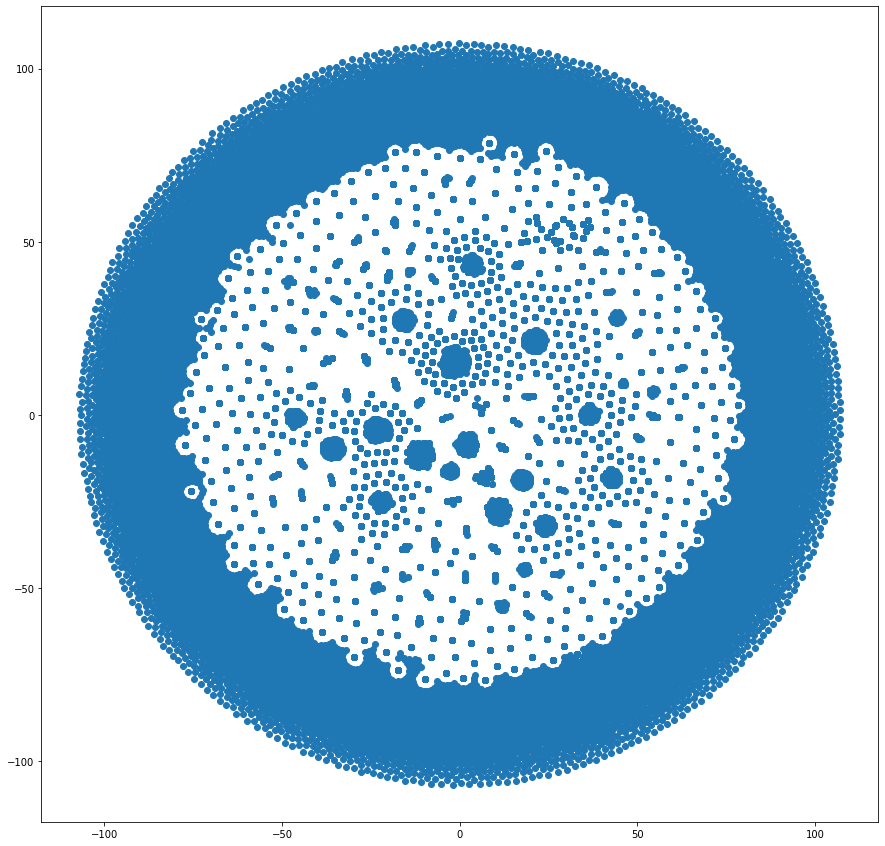

In [ ]:
# Create a scatter plot of the t-SNE output and observe clusters (if any)

# Make a copy of the df 
sample1_tsne_df = sample1_pca_df.copy()

# Add x and y columns 
sample1_tsne_df['x'] = tsne_features_s1[:,0]
sample1_tsne_df['y'] = tsne_features_s1[:,1]

# Display the t-SNE scatter plot
plt.figure(figsize=(15,15))
plt.scatter(sample1_tsne_df['x'], sample1_tsne_df['y'])
plt.show()

Create a Model

,k,inertia
0,1,2.178952e+08
1,2,1.430592e+08
2,3,9.184484e+07
3,4,6.863899e+07
4,5,5.705444e+07
5,6,4.630012e+07
6,7,3.917922e+07
7,8,3.483372e+07
8,9,3.152404e+07
9,10,2.853652e+07


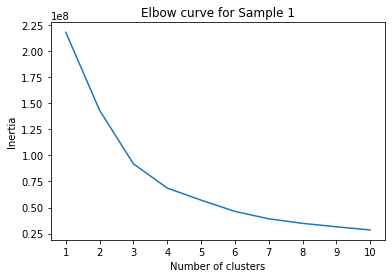

In [ ]:
from sklearn.cluster import KMeans

# Use a for-loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(sample1_tsne_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
sample1_elbow = pd.DataFrame(elbow_data)
display(sample1_elbow)

# Plot the elbow curve to find the best candidate(s) for k
plt.plot(sample1_elbow['k'], sample1_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Sample 1')
plt.show()

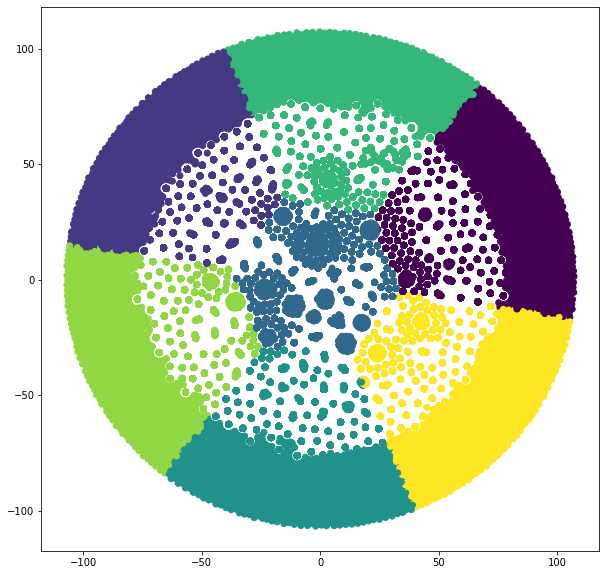

In [ ]:
# Run k-means predictions with clusters = 7
kmeans_7 = KMeans(n_clusters=7, random_state=0)
y_kmeans_7 = kmeans_7.fit_predict(sample1_tsne_df)

# Copy crypto_tsne_df, add the prediction outputs into new columns
sample1_cluster_df = sample1_tsne_df.copy()
sample1_cluster_df['y_kmeans_7'] = y_kmeans_7
#display(crypto_cluster_df)

# Create t-SNE scatter plot, use cluster predictions for color coding
# -- Clusters = 7
plt.figure(figsize=(10,10))
plt.scatter(sample1_cluster_df['x'], sample1_cluster_df['y'], c=sample1_cluster_df['y_kmeans_7'])
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red', label='Centroids')
plt.show()

In [ ]:
#attempting to return clusters as a list
import numpy as np


kmeans_7.cluster_centers_
kmeans_7.labels_

mydict = {i: np.where(kmeans_7.labels_ ==i)[0]
          for i in range(kmeans_7.n_clusters)}
mydict

{0: array([  742,   743,   744, ..., 55846, 55847, 55848]),
 1: array([ 1192,  1193,  1194, ..., 55621, 55633, 55646]),
 2: array([   22,   170,   171, ..., 55879, 55880, 55881]),
 3: array([   25,    29,    36, ..., 55739, 55740, 55741]),
 4: array([  510,   511,   512, ..., 55631, 55632, 55638]),
 5: array([    0,     1,     2, ..., 55882, 55883, 55884]),
 6: array([   23,    24,    26, ..., 55670, 55671, 55672])}

In [ ]:
selected_movie = []
cluster_list_1 = []
cluster_list_2 = []
cluster_list_3 = []
cluster_list_4 = []
cluster_list_5 = []
cluster_list_6 = []
cluster_list_7 = []


for i in mydict[0]:
  cluster_list_1.append(df_imdb_S1_test.iloc[i])
for i in mydict[1]:
  cluster_list_2.append(df_imdb_S1_test.iloc[i])
for i in mydict[2]:
  cluster_list_3.append(df_imdb_S1_test.iloc[i])
for i in mydict[3]:
  cluster_list_4.append(df_imdb_S1_test.iloc[i])
for i in mydict[4]:
  cluster_list_5.append(df_imdb_S1_test.iloc[i])
for i in mydict[5]:
  cluster_list_6.append(df_imdb_S1_test.iloc[i])
for i in mydict[6]:
  cluster_list_7.append(df_imdb_S1_test.iloc[i])





In [ ]:
#remove duplicates from output
list_1 = pd.DataFrame.from_dict(cluster_list_1)
title_1 = list_1.drop_duplicates(subset='Title', keep='first')

list_2 = pd.DataFrame.from_dict(cluster_list_2)
title_2 = list_2.drop_duplicates(subset='Title', keep='first')


list_3 = pd.DataFrame.from_dict(cluster_list_3)
title_3 = list_3.drop_duplicates(subset='Title', keep='first')


list_4 = pd.DataFrame.from_dict(cluster_list_4)
title_4 = list_4.drop_duplicates(subset='Title', keep='first')


list_5 = pd.DataFrame.from_dict(cluster_list_5)
title_5 = list_5.drop_duplicates(subset='Title', keep='first')


list_6 = pd.DataFrame.from_dict(cluster_list_6)
title_6 = list_6.drop_duplicates(subset='Title', keep='first')


list_7 = pd.DataFrame.from_dict(cluster_list_7)
title_7 = list_7.drop_duplicates(subset='Title', keep='first')



In [ ]:
title_1_list = title_1["Title"].to_list()
title_2_list = title_2["Title"].to_list()
title_3_list = title_3["Title"].to_list()
title_4_list = title_4["Title"].to_list()
title_5_list = title_5["Title"].to_list()
title_6_list = title_6["Title"].to_list()
title_7_list = title_7["Title"].to_list()

title_7_list

['ABugsLife',
 'AFairlyOddChristmas',
 'AFieldInEngland',
 'AHauntedHouse',
 'ARoyalNightOut',
 'ASoundOfThunder',
 'Adaptation',
 'AfterLastSeason',
 'AliFearEatsTheSoul',
 'Alien2OnEarth',
 'AnAmericanCarol',
 'AnAmericanTail',
 'AnEducation',
 'AnalyzeThis',
 'AnchormanTheLegendOfRonBurgundy',
 'AnotherThinMan',
 'Arena1953',
 'ArtemisFowl',
 'AssaultOnPrecinct132005',
 'BabettesFeast',
 'BabyMama',
 'BaiseMoi',
 'Barbarella',
 'BarneysGreatAdventure',
 'BatmanReturns',
 'BattleLosAngeles',
 'BeCool',
 'Beethoven',
 'BestPlayer',
 'BeyondTheForest',
 'Birdemic2TheResurrection',
 'BitterMoon',
 'BlackChristmas2019',
 'BlackRobe',
 'BlondeCrazy',
 'BodyguardsAndAssassins',
 'BraddockMissingInActionIII',
 'BrotherBear',
 'Bullitt',
 'Bushwhacked',
 'CaddyshackII',
 'CallMeByYourName',
 'CampNowhere',
 'CampRock',
 'CannibalFerox',
 'CasinoRoyale1967',
 'CasualtiesOfWar',
 'Chisum',
 'CityIsland',
 'CitySlickers',
 'ClassOf1999',
 'Clifford',
 'CookiesFortune',
 'CoolRunnings',
 'Countd

In [ ]:
list_of_lists = [title_1_list, title_2_list, title_3_list, title_4_list, title_5_list, title_6_list, title_7_list]

print(list_of_lists)
print(list_of_lists[0])



[['AHistoryOfViolence', 'AMidnightClear', 'AMightyHeart', 'ASongIsBorn', 'AStarIsBorn1937', 'AStarIsBorn1954', 'AlienFromLA', 'AlienResurrection', 'AlreadyTomorrowInHongKong', 'AmericanGangster', 'AnAmericanTail', 'AnEducation', 'AnchormanTheLegendOfRonBurgundy', 'AngelsAndDemons', 'AshesAndDiamonds', 'AssaultOnPrecinct132005', 'AtPlayInTheFieldsOfTheLord', 'AttackOfTheMoonZombies', 'BabysDayOut', 'Bamboozled', 'Barbarella', 'BarryLyndon', 'Basic', 'BatmanReturns', 'Baywatch', 'BeastsOfTheSouthernWild', 'Beethoven', 'BigMoneyRustlas', 'BlankCheck', 'BloodAndBlackLace', 'BloodFest', 'Bloodfist', 'BooneTheBountyHunter', 'BoyEatsGirl', 'BrainDonors', 'BrotherBear', 'Bullitt', 'CJ7', 'CallMeByYourName', 'CampRock', 'CasinoRoyale1967', 'CasualtiesOfWar', 'ChasingAmy', 'CitySlickers', 'ClubDread', 'ColdPrey2', 'ComeOutAndPlay', 'CoolRunnings', 'Coonskin', 'CountryStrong', 'CourageUnderFire', 'Crooklyn', 'DCCab', 'DangerDiabolik', 'DeadPoetsSociety', 'Deafula', 'DearLemonLima', 'DeepBlueSea',

In [ ]:
sel_movie = "CouplesRetreat"

for list in list_of_lists:
  if sel_movie in list:
    print(random.sample(list, 10))
    

['AnotherThinMan', 'Scream4', 'DirtyPrettyThings', 'Series7TheContenders', 'PinocchioAndTheEmperorOfTheNight', 'TheBigYear', 'TheLastBoyScout', 'TheTwilightSamurai', 'TheNuttHouse', 'PicnicAtHangingRock']
